## **BONUS TASK**

This problem description is the same as Task 3. But there are some technical challenges that you have to choose one.

1.   Compare 3 different configurations while your model is wider/deeper. Show and explain the performance result.
2.   Compare 3 configurations for different Loss Function. Show and explain your performance result.
3. Compare 3 configurations for the activation function. Show and explain your performance result.

In [ ]:
#Import all libraries
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
# Load MNIST dataset for the data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

Comparing diverse configurations for activation functions is a crucial step in model development. In this experiment, we will train and evaluate three distinct models employing different activation function approaches.


*   Model 1: ReLU activation function. This activation function is applied to the first layer (fc1) and aids in accelerating convergence during training.
*   Model 2: Sigmoid activation function. This function adjusts the output of the first layer to a range between 0 and 1, proving useful for binary classification tasks.
*   Model 3: Softmax activation function. This function is applied to the output layer (fc2) to generate a probability distribution, particularly beneficial for multi-class classification tasks.


Here is the code implementation for the three models:

In [ ]:
# Model 1: ReLU activation function

class Model1(nn.Module): # Define a neural network model named Model1 that inherits from nn.Module
  def __init__(self): # Constructor method (__init__) initializes the object when an instance is created
      super(Model1, self).__init__() # Initialize the Model1 class as a subclass of nn.Module
      self.fc1 = nn.Linear(28*28, 128) # Input size: 28*28, Output size: 128
      self.fc2 = nn.Linear(128, 10) # Input size: 128, Output size: 10

  def forward(self, x): # Forward method defines the forward pass of the neural network
      x = x.view(-1, 28*28) # Reshape the input tensor x to have dimensions (-1, 28*28)
      x = torch.relu(self.fc1(x)) # Apply the ReLU activation function to the output of fc1
      x = self.fc2(x) # Pass the result through fc2 (no activation function here)
      return x # Return the final output

In [ ]:
# Model 2: Sigmoid activation function

class Model2(nn.Module): # Define a neural network model named Model2 that inherits from nn.Module
  def __init__(self): # Constructor method (__init__) initializes the object when an instance is created
      super(Model2, self).__init__() # Initialize the Model2 class as a subclass of nn.Module
      self.fc1 = nn.Linear(28*28, 128) # Input size: 28*28, Output size: 128
      self.fc2 = nn.Linear(128, 10) # Input size: 128, Output size: 10

  def forward(self, x):  # Forward method defines the forward pass of the neural network
      x = x.view(-1, 28*28) # Reshape the input tensor x to have dimensions (-1, 28*28)
      x = torch.sigmoid(self.fc1(x)) # Apply the sigmoid activation function to the output of fc1
      x = self.fc2(x) # Pass the result through fc2 (no activation function here)
      return x # Return the final output

In [ ]:
# Model 3: Softmax activation function

class Model3(nn.Module): # Define a neural network model named Model3 that inherits from nn.Module
  def __init__(self): # Constructor method (__init__) initializes the object when an instance is created
      super(Model3, self).__init__() # Initialize the Model2 class as a subclass of nn.Module
      self.fc1 = nn.Linear(28*28, 128)  # Input size: 28*28, Output size: 128
      self.fc2 = nn.Linear(128, 10) # Input size: 128, Output size: 10

  def forward(self, x): # Forward method defines the forward pass of the neural network
      x = x.view(-1, 28*28) # Reshape the input tensor x to have dimensions (-1, 28*28)
      x = self.fc1(x)  # Pass the input through fc1 without an activation function
      x = torch.softmax(x, dim=1) # Apply the softmax activation function to the output of fc1 along dimension 1
      x = self.fc2(x) # Pass the result through fc2 without an activation function
      return x # Return the final output

In the code above, each model is configured with a different activation function: ReLU, Sigmoid, and Softmax. With this configuration, we can conduct experiments to determine which model is most suitable for the classification task at hand.

### Loss Function menggunakan Cross Entropy loss function

With the configuration below, the model can be trained using a training approach suitable for the Cross Entropy Loss Function, with a specific learning rate, momentum, and number of epochs. This configuration is typically used in training approaches employing algorithms such as Stochastic Gradient Descent (SGD).

In [ ]:
cross_el = nn.CrossEntropyLoss() # Using Cross Entropy loss function
learning_rate = 0.01 # Configuring the learning rate
momentum = 0.9 # Configuring momentum
num_epochs = 5 # Number of epochs or training iterations

The provided code below is for training and evaluating multiple neural network models using PyTorch. The training is done using Stochastic Gradient Descent (SGD) as the optimizer, and the models are trained for a specified number of epochs on a training dataset (train_loader). After training, the code evaluates the accuracy of each trained model on a separate test dataset (test_loader).  Here's a breakdown of the code:

In [ ]:
models = [Model1(), Model2(), Model3()] # Create instances of three different neural network models
accuracies = [] # Create an empty list to store accuracy values for each model

# Loop through each model
for i, model in enumerate(models):
  print(f"Model {i+1}")
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) # Define the optimizer for Stochastic Gradient Descent (SGD)

  # Loop through the specified number of epochs for training
  for epoch in range(num_epochs):
    running_loss = 0.0
    # Loop through batches of data in the training loader
    for j, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad() # Zero the gradients to prevent accumulation

        outputs = model(inputs) # Forward pass: compute predicted outputs by passing inputs to the model
        loss = cross_el(outputs, labels) # Compute the Cross Entropy loss
        loss.backward() # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step() # Perform a single optimization step (parameter update)

        running_loss += loss.item()# Accumulate running loss
        # Print running loss every 100 batches
        if j % 100 == 99:
            print(f"[{epoch+1}, {j+1}] loss: {running_loss/100:.3f}")
            running_loss = 0.0

  # Evaluate the model on the test set
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1) # Get predicted labels
          total += labels.size(0)
          correct += (predicted == labels).sum().item() # Count correct predictions

  accuracy = 100 * correct / total # Calculate and print the accuracy of the model on the test set
  print(f"Accuracy: {accuracy}%") # Print the accuracy of each models
  accuracies.append(accuracy) # Append accuracy to the list

print("Accuracies:", accuracies) # Print the accuracies of all models

Model 1
[1, 100] loss: 1.310
[1, 200] loss: 0.687
[1, 300] loss: 0.738
[1, 400] loss: 0.621
[1, 500] loss: 0.589
[1, 600] loss: 0.550
[1, 700] loss: 0.502
[1, 800] loss: 0.538
[1, 900] loss: 0.568
[1, 1000] loss: 0.437
[1, 1100] loss: 0.524
[1, 1200] loss: 0.458
[1, 1300] loss: 0.425
[1, 1400] loss: 0.460
[1, 1500] loss: 0.453
[1, 1600] loss: 0.481
[1, 1700] loss: 0.362
[1, 1800] loss: 0.454
[1, 1900] loss: 0.520
[1, 2000] loss: 0.394
[1, 2100] loss: 0.489
[1, 2200] loss: 0.433
[1, 2300] loss: 0.383
[1, 2400] loss: 0.410
[1, 2500] loss: 0.337
[1, 2600] loss: 0.354
[1, 2700] loss: 0.388
[1, 2800] loss: 0.363
[1, 2900] loss: 0.254
[1, 3000] loss: 0.368
[1, 3100] loss: 0.387
[1, 3200] loss: 0.383
[1, 3300] loss: 0.260
[1, 3400] loss: 0.322
[1, 3500] loss: 0.424
[1, 3600] loss: 0.415
[1, 3700] loss: 0.318
[1, 3800] loss: 0.375
[1, 3900] loss: 0.255
[1, 4000] loss: 0.371
[1, 4100] loss: 0.430
[1, 4200] loss: 0.340
[1, 4300] loss: 0.274
[1, 4400] loss: 0.327
[1, 4500] loss: 0.323
[1, 4600] l

In summary, this code trains and evaluates three different neural network models (Model1, Model2, Model3) using Stochastic Gradient Descent (SGD) as the optimizer and Cross Entropy loss as the loss function. It prints the loss during training and the accuracy on the test data for each model, and finally, it prints the accuracies of all models.

In [ ]:
print("Accuracies:", accuracies)

Accuracies: [95.24, 97.0, 73.57]


###Conclusion

**Model 1** <br></br>
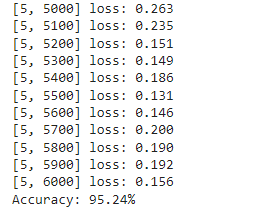

**Model 2** <br></br>

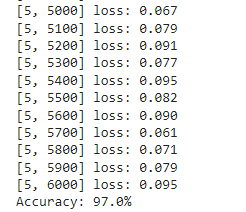

**Model 3**

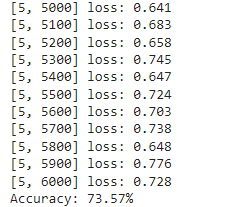

The accuracy results reveal compelling insights into the performance of each model with distinct activation functions:

**Model 1 (ReLU Activation): 95.24%**
The ReLU activation function demonstrates robust performance, achieving an accuracy of 95.24%. This is indicative of its ability to facilitate convergence during training, contributing to the model's overall efficacy in capturing intricate patterns within the data.

**Model 2 (Sigmoid Activation): 97.0%**
The superior performance of the model utilizing the sigmoid activation function, with an accuracy of 97.0%, suggests that sigmoid is particularly effective in binary classification scenarios. Its capacity to squash outputs into a range between 0 and 1 is advantageous for tasks where a probability-like interpretation is beneficial.

**Model 3 (Softmax Activation): 73.57%**
The Softmax activation function yields the least favorable performance, with an accuracy of 73.57%. Softmax is commonly employed in multi-class classification, but its tendency to accentuate differences between classes might not align optimally with the specific characteristics of the dataset, leading to suboptimal performance.

From this evaluation, it is evident that the model using the **sigmoid activation function performs the best with an accuracy of 97.0%.** The model with ReLU activation function also performs well with an accuracy of 95.24%, while the model with Softmax activation function shows the lowest performance with an accuracy of 73.57%. This indicates that the choice of activation function can significantly influence model performance, underscoring the importance of selecting the appropriate activation function for achieving good results in classification tasks.